## Final Project Submission

### Student Name: Natalya Doris
### Student Pace: Flex / 40 weeks
### Scheduled Project Review Date / Time:
### Instructor Name: Abhineet Kulkarni
### Blog Post URL:

Example Text: 

- Example text    

`example line of code`


In [ ]:
# Project Proposal

# Question 1: When doing your analysis, what measurement will you use to determine the success of a movie? 
# (e.g.: rating, return on investment, worldwide gross)

#I'd like to focus primarily on profit margin & return on investment to help Microsoft determine the most efficient use of its capital in investing in the movie business. I would also like to compare reviews to profitability to see what kind of relationship exists between the two variables / whether that can inform how they strategize which genres or types of movies they focus on.

# I would like to focus on return on investment, first, rating second

# Question 2: What are some aspects of a movie you could investigate? (e.g.: Genres, Release time, 
# Director/Actors, Budget)

#I would like to investigate genre as well as total number of genres per movie, both by profitability & average review. I'd also like to investigate seasonality - what is the best time of year to release? Have there been any trends over the years with regards to worldwide revenues and profits? Other factors I would like to look at are run time (is there an ideal movie length?), language, directors (ranked by success in terms of total gross and profitability), and domestic versus foreign revenue. I'd also like to take a look at the most successful studios to understand their average budget size, market focus, most common genre, etc.

# Most successful genre / combo of genres? both by profit and average review (only look at reviews with min number of votes)
# Most successful directors - by profit and average review
# Seasonality - best time of year to release? other time trends - worldwide revenues / profits over time
# language
# popularity vs profit
# runtime - can a movie be too long?

# Number of movies per year per studio - more movies at low budget or less movies at higher budget?
# average budget size per studio, profit margin higher in low budget or high budget movies?
# whether majority of revenue was domestic or foreign markets
# which of domestic or foreign markets are growing more rapidly

# Business Problem

# Microsoft sees all the big companies creating original video content and they want to get in on the fun. 
# They have decided to create a new movie studio, but they don’t know anything about creating movies. You 
# are charged with exploring what types of films are currently doing the best at the box office. You must 
# then translate those findings into actionable insights that the head of Microsoft's new movie studio 
# acan use to help decide what type of films to create.

# Key points
# Your analysis should yield three concrete business recommendations

# Ideas

# Budget size vs profit
# ideal profit margin

# Import Statements

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
from datetime import datetime
import seaborn as sns

# Load in the Data

In [2]:
conn = sqlite3.Connection('zippedData/im.db')
table_names = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
display(table_names)

#df_im_directors = pd.read_sql("""SELECT * FROM directors; """, conn)
df_im_movie_ratings = pd.read_sql("""SELECT * FROM movie_ratings; """, conn)
df_im_movie_basics = pd.read_sql("""SELECT * FROM movie_basics; """, conn)
#df_im_persons = pd.read_sql("""SELECT * FROM persons; """, conn)
#df_im_writers = pd.read_sql("""SELECT * FROM writers; """, conn)

df_im = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
""", conn)

conn.close()

df_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
df_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv', delimiter='\t')
df_review = pd.read_csv('zippedData/rt.reviews.tsv', delimiter='\t', encoding='latin-1')
df_movies = pd.read_csv('zippedData/tmdb.movies.csv')
df_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [50]:
#df_movies = pd.read_csv('zippedData/tmdb.movies.csv')
#df_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')

# EDA

In [3]:
display(df_movie_gross.head())
display(df_review.head())
display(df_movie_budgets.head())
display(df_movie_info.head()) # genres split by | need to create separate columns for each genre, boolean values
display(df_movies.head())
display(df_im.head())

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [ ]:
df_movies.info()

# Which should I use for review data?
display(df_movies[df_movies['original_title']=='Harry Potter and the Deathly Hallows: Part 1']) 
display(df_im[df_im['original_title']=='Harry Potter and the Deathly Hallows: Part 1'])

In [25]:
# Which to use for budget and revenue data?

df_movie_budgets.info()
df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   int64  
 4   domestic_gross     5782 non-null   int64  
 5   worldwide_gross    5782 non-null   int64  
 6   year               5782 non-null   int64  
 7   month              5782 non-null   object 
 8   foreign_gross      5782 non-null   int64  
 9   profit             5782 non-null   int64  
 10  profit_margin      5782 non-null   float64
 11  roi                5782 non-null   float64
dtypes: float64(2), int64(7), object(3)
memory usage: 542.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  -

## Create Final Working Dataset

### Cleaning Data

In [51]:
# Transform financial data into integers from strings
df_movie_budgets['production_budget'] = [int(budget[1:].replace(',','')) for budget in 
                                                df_movie_budgets['production_budget']]
df_movie_budgets['domestic_gross'] = [int(budget[1:].replace(',','')) for budget in 
                                             df_movie_budgets['domestic_gross']]
df_movie_budgets['worldwide_gross'] = [int(budget[1:].replace(',','')) for budget in 
                                              df_movie_budgets['worldwide_gross']]

In [52]:
# Transform date data into datetime object

display(df_movie_budgets['release_date'][0])
#date_time_obj = datetime.strptime(df_movie_budgets['release_date'][0], '%b %d, %Y')
#date_time_obj

display(df_movies['release_date'][0])
#date_time_obj = datetime.strptime(df_movies['release_date'][0], '%Y-%m-%d')
#date_time_obj

df_movie_budgets['release_date'] = [datetime.strptime(date, '%b %d, %Y') for date in df_movie_budgets['release_date']]
df_movies['release_date'] = [datetime.strptime(date, '%Y-%m-%d') for date in df_movies['release_date']]

'Dec 18, 2009'

'2010-11-19'

In [30]:
## NEED TO FIGURE OUT HOW TO DEAL WITH DIFFERENT VERSIONS OF SAME TITLE

display(df_movie_gross[df_movie_gross['title'].str.contains('Star Wars')])
display(df_movie_budgets[df_movie_budgets['movie'].str.contains('Star Wars')])
display(df_movies[df_movies['original_title'].str.contains('Star Wars')])
display(df_im[df_im['original_title'].str.contains('Star Wars')])

,title,studio,domestic_gross,foreign_gross,year
793,Star Wars: Episode I - The Phantom Menace (in 3D),Fox,43500000.0,59300000,2012
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
3101,Solo: A Star Wars Story,BV,213800000.0,179200000,2018


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2015
11,12,"May 25, 2018",Solo: A Star Wars Story,"$275,000,000","$213,767,512","$393,151,347",2018
44,45,"Dec 16, 2016",Rogue One: A Star Wars Story,"$200,000,000","$532,177,324","$1,049,102,856",2016
303,4,"May 19, 1999",Star Wars Ep. I: The Phantom Menace,"$115,000,000","$474,544,677","$1,027,044,677",1999
304,5,"May 19, 2005",Star Wars Ep. III: Revenge of the Sith,"$115,000,000","$380,270,577","$848,998,877",2005
305,6,"May 16, 2002",Star Wars Ep. II: Attack of the Clones,"$115,000,000","$310,676,740","$656,695,615",2002
1783,84,"May 25, 1983",Star Wars Ep. VI: Return of the Jedi,"$32,500,000","$309,205,079","$572,705,079",1983
2367,68,"May 21, 1980",Star Wars Ep. V: The Empire Strikes Back,"$23,000,000","$290,271,960","$534,161,334",1980
3464,65,"May 25, 1977",Star Wars Ep. IV: A New Hope,"$11,000,000","$460,998,007","$786,598,007",1977


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
62,62,"[35, 878, 16]",51888,en,Robot Chicken: Star Wars Episode III,13.062,2010-12-19,Robot Chicken: Star Wars Episode III,7.5,60
1174,1174,"[16, 878, 35, 10751]",79158,en,Lego Star Wars: Bombad Bounty,1.347,2010-11-27,Lego Star Wars: Bombad Bounty,5.6,7
2960,2960,"[16, 10751, 878]",70608,en,Lego Star Wars: The Padawan Menace,5.409,2011-07-22,Lego Star Wars: The Padawan Menace,6.1,53
4693,4693,[35],515773,en,Star Wars Spoofs,0.600,2011-01-01,Star Wars Spoofs,6.5,2
5636,5636,"[878, 16, 28, 10751, 35]",136406,en,Lego Star Wars: The Empire Strikes Out,5.268,2012-09-26,Lego Star Wars: The Empire Strikes Out,6.6,35
8986,8986,[16],379095,en,Lego Star Wars: The Yoda Chronicles: Episode I...,1.897,2013-11-27,Lego Star Wars: The Yoda Chronicles: Episode I...,6.2,6
9379,9379,"[28, 12, 16, 878]",366224,en,Lego Star Wars: The Yoda Chronicles - Menace o...,1.185,2013-09-04,Lego Star Wars: The Yoda Chronicles - Menace o...,6.4,8
10222,10222,"[28, 16, 878]",282315,en,Star Wars: Bounty Hunter - Beyond The Game,0.600,2013-09-19,Star Wars: Bounty Hunter - Beyond The Game,7.5,2
11779,11779,"[12, 16, 28, 878]",287663,en,Star Wars Rebels: Spark of Rebellion,3.523,2014-10-03,Star Wars Rebels: Spark of Rebellion,7.0,56
11874,11874,"[28, 16, 35, 10751, 878]",392216,en,Phineas and Ferb: Star Wars,2.829,2014-10-21,Phineas and Ferb: Star Wars,6.9,40


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_list,Reality-TV,...,Sport,Animation,Western,Biography,Music,News,Crime,Musical,Sci-Fi,Adventure
21144,tt2275656,Star Wars: Threads of Destiny,Star Wars: Threads of Destiny,2014,110.0,"Action,Adventure,Sci-Fi",4.1,486,"[Action, Adventure, Sci-Fi]",0,...,0,0,0,0,0,0,0,0,1,1
25595,tt2488496,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,2015,136.0,"Action,Adventure,Fantasy",8.0,784780,"[Action, Adventure, Fantasy]",0,...,0,0,0,0,0,0,0,0,0,1
26070,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"Action,Adventure,Fantasy",7.1,462903,"[Action, Adventure, Fantasy]",0,...,0,0,0,0,0,0,0,0,0,1
38331,tt3648510,Plastic Galaxy: The Story of Star Wars Toys,Plastic Galaxy: The Story of Star Wars Toys,2014,70.0,"Documentary,History,Sci-Fi",6.5,488,"[Documentary, History, Sci-Fi]",0,...,0,0,0,0,0,0,0,0,1,0
39816,tt3778644,Solo: A Star Wars Story,Solo: A Star Wars Story,2018,135.0,"Action,Adventure,Fantasy",7.0,226243,"[Action, Adventure, Fantasy]",0,...,0,0,0,0,0,0,0,0,0,1
40132,tt3810772,Star Wars: The New Republic,Star Wars: The New Republic,2014,NaN,"Action,Adventure,Sci-Fi",6.0,9,"[Action, Adventure, Sci-Fi]",0,...,0,0,0,0,0,0,0,0,1,1
47521,tt4644286,Star Wars Begins: A Filmumentary,Star Wars Begins: A Filmumentary,2011,139.0,Documentary,8.2,46,[Documentary],0,...,0,0,0,0,0,0,0,0,0,0
57991,tt5957180,Star Wars: The Dark Reckoning,Star Wars: The Dark Reckoning,2017,45.0,Sci-Fi,5.8,12,[Sci-Fi],0,...,0,0,0,0,0,0,0,0,1,0
66745,tt7421764,Star Wars: Rise of the First Order,Star Wars: Rise of the First Order,2017,87.0,"Action,Drama",5.4,7,"[Action, Drama]",0,...,0,0,0,0,0,0,0,0,0,0
72650,tt9129500,Fall of Lotus: A Star Wars Story,Fall of Lotus: A Star Wars Story,2018,NaN,"Action,Adventure,Fantasy",7.5,10,"[Action, Adventure, Fantasy]",0,...,0,0,0,0,0,0,0,0,0,1


### Feature Engineering

Since any given movie can have multiple genres, I create a column for each genre. If a movie is of that genre, the value in that column will be 1, otherwise 0.

In [53]:
# Genre dictionary for Movie DB dataset
genre_dict = {'Action': '28', 
             'Adventure': '12', 
             'Animation': '16', 
             'Comedy': '35', 
             'Crime': '80',
             'Documentary': '99',
             'Drama': '18',
             'Family': '10751',
             'Fantasy': '14',
             'History': '36',
             'Horror': '27',
             'Music': '10402',
             'Mystery': '9648',
             'Romance': '10749',
             'Science Fiction': '878',
             'TV Movie': '10770',
             'Thriller': '53',
             'War': '10752',
             'Western': '37'}

# Transform genre ID to genre
def get_key(val):
    for key, value in genre_dict.items():
        if val == value:
            return key

df_movies['genre_ids'] = [genres.strip('][').split(', ') for genres in df_movies['genre_ids']]
df_movies['genre_list'] = [[get_key(val) for val in genres] for genres in df_movies['genre_ids']]
df_movies.head()

#x = [[int(j) for j in i] for i in test] don't need to convert to int

#df_im['genre_list'] = [genres.split(',') for genres in df_im['genres']]

#df_movies['genre_list'] = [genre_dict[genre_id]]
#df_movies_im = df_movies.merge(df_im, how='left', on='original_title')

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_list
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"[Adventure, Fantasy, Family]"
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"[Fantasy, Adventure, Animation, Family]"
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"[Adventure, Action, Science Fiction]"
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"[Animation, Comedy, Family]"
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"[Action, Science Fiction, Adventure]"


In [54]:
genre_list = list(genre_dict.keys())
import numpy as np
stringsCheck = genre_list
df_movies['genres'] = [','.join(map(str, l)) for l in df_movies['genre_list']]
for i in stringsCheck:
    df_movies[f'{i}'] = np.where(df_movies.genres.str.contains(f'{i}'), 1, 0)
    
display(df_movies.head(10))
#df_movies.to_csv('df_movies.csv')

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,...,0,0,0,0,0,0,0,0,0,0
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,0,0,0,0,0,0,0,0,0,0
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,0,0,0,0,0,1,0,0,0,0
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,...,0,0,0,0,0,0,0,0,0,0
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,...,0,0,0,0,0,1,0,0,0,0
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,...,0,0,0,0,0,0,0,0,0,0
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,...,0,0,0,0,0,1,0,0,0,0
7,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,...,0,0,0,0,0,0,0,0,0,0
8,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,...,0,0,0,0,0,0,0,0,0,0
9,9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635,...,0,0,0,0,0,1,0,0,0,0


In [49]:
df_movies.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count',
       'genre_list', 'genres', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western', 'key'],
      dtype='object')

In [57]:
## Adding Year and Month Variables to Track Seasonality

# If it was a string:
#df_movie_budgets['year'] = [int(date[-4:]) for date in df_movie_budgets['release_date']]
#df_movie_budgets['month'] = [date[:3] for date in df_movie_budgets['release_date']]

# Datetime object
df_movie_budgets['year'] = pd.DatetimeIndex(df_movie_budgets['release_date']).year
df_movie_budgets['month'] = pd.DatetimeIndex(df_movie_budgets['release_date']).month

df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,6
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12


In [59]:
# Create new variables to measure foreign revenues & profitability 
df_movie_budgets['foreign_gross'] = df_movie_budgets['worldwide_gross'] - df_movie_budgets['domestic_gross']
df_movie_budgets['profit'] = df_movie_budgets['worldwide_gross'] - df_movie_budgets['production_budget']
df_movie_budgets['profit_margin'] = df_movie_budgets['profit'] / df_movie_budgets['worldwide_gross']
df_movie_budgets['roi'] = df_movie_budgets['profit'] / df_movie_budgets['production_budget']

df_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
 6   year               5782 non-null   int64         
 7   month              5782 non-null   int64         
 8   foreign_gross      5782 non-null   int64         
 9   profit             5782 non-null   int64         
 10  profit_margin      5782 non-null   float64       
 11  roi                5782 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(8), object(1)
memory usage: 542.2+ KB


In [60]:
## merge genre data and budget / revenue data

# only keeping columns we need
df_movies = df_movies[['original_title', 'popularity', 'release_date', 'original_language', 
                       'vote_average', 'vote_count', 'genre_list', 'genres', 'Action', 'Adventure', 
                       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 
                       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 
                       'Western']]
df_movie_budgets = df_movie_budgets[['movie', 'release_date', 'production_budget', 'domestic_gross', 'foreign_gross', 'worldwide_gross',
                 'month','year','profit','profit_margin','roi']]

# create merge key to avoid potential duplicate titles
df_movies['key'] = df_movies['release_date'].astype(str) + " " + df_movies['original_title'] 
df_movie_budgets['key'] = df_movie_budgets['release_date'].astype(str) + " " + df_movie_budgets['movie']

# merge on key
df_genres = df_movie_budgets.merge(df_movies, how='left', on='key')

display(df_genres.describe())
display(df_genres.info())
display(df_movie_budgets.describe())
display(df_movie_budgets.info())
display(df_movies.describe())
display(df_movies.info())

# around 200 movie titles repeated (more than one match in df_movies dataframe) - let's see what these are

# Also around 4000 movies which did not have a genre

df_genres.to_csv('test.csv')

/var/folders/wl/4cw_k4nj07d773kdv1fw53tc0000gn/T/ipykernel_9956/1739362644.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['key'] = df_movies['release_date'].astype(str) + " " + df_movies['original_title']


,production_budget,domestic_gross,foreign_gross,worldwide_gross,month,year,profit,profit_margin,roi,popularity,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
count,5.912000e+03,5.912000e+03,5.912000e+03,5.912000e+03,5912.000000,5912.000000,5.912000e+03,5912.000000,5912.000000,1401.000000,...,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,1401.0,1401.000000,1401.000000,1401.000000
mean,3.192615e+07,4.240481e+07,5.068521e+07,9.309003e+07,7.096752,2004.199763,6.116388e+07,-inf,3.781725,13.346337,...,0.044254,0.119201,0.031406,0.075660,0.126338,0.127766,0.0,0.287652,0.027837,0.013562
std,4.228952e+07,6.895136e+07,1.142617e+08,1.765552e+08,3.490487,12.707044,1.475009e+08,NaN,29.214748,8.051220,...,0.205733,0.324140,0.174475,0.264548,0.332349,0.333948,0.0,0.452829,0.164565,0.115704
min,1.100000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1915.000000,-2.002376e+08,-inf,-1.000000,0.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,5.000000e+06,1.523471e+06,0.000000e+00,4.289556e+06,4.000000,2000.000000,-2.108585e+06,-0.997552,-0.499386,8.459000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,1.700000e+07,1.738582e+07,6.189710e+06,2.839609e+07,7.000000,2007.000000,8.809866e+06,0.420093,0.724414,11.546000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,4.000000e+07,5.285992e+07,4.752809e+07,9.896844e+07,10.000000,2013.000000,6.271838e+07,0.736214,2.790949,16.302000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000
max,4.250000e+08,9.366622e+08,2.015838e+09,2.776345e+09,12.000000,2020.000000,2.351345e+09,0.999444,1799.000000,80.773000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5912 entries, 0 to 5911
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie              5912 non-null   object        
 1   release_date_x     5912 non-null   datetime64[ns]
 2   production_budget  5912 non-null   int64         
 3   domestic_gross     5912 non-null   int64         
 4   foreign_gross      5912 non-null   int64         
 5   worldwide_gross    5912 non-null   int64         
 6   month              5912 non-null   int64         
 7   year               5912 non-null   int64         
 8   profit             5912 non-null   int64         
 9   profit_margin      5912 non-null   float64       
 10  roi                5912 non-null   float64       
 11  key                5912 non-null   object        
 12  original_title     1401 non-null   object        
 13  popularity         1401 non-null   float64       
 14  release_

None

,production_budget,domestic_gross,foreign_gross,worldwide_gross,month,year,profit,profit_margin,roi
count,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000,5782.000000,5.782000e+03,5782.000000,5782.000000
mean,3.158776e+07,4.187333e+07,4.961413e+07,9.148746e+07,7.050675,2003.967139,5.989970e+07,-inf,3.800161
std,4.181208e+07,6.824060e+07,1.131192e+08,1.747200e+08,3.480147,12.724386,1.460889e+08,NaN,29.530282
min,1.100000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1915.000000,-2.002376e+08,-inf,-1.000000
25%,5.000000e+06,1.429534e+06,0.000000e+00,4.125415e+06,4.000000,2000.000000,-2.189071e+06,-1.031301,-0.507704
50%,1.700000e+07,1.722594e+07,5.701766e+06,2.798445e+07,7.000000,2007.000000,8.550286e+06,0.414626,0.708310
75%,4.000000e+07,5.234866e+07,4.682110e+07,9.764584e+07,10.000000,2012.000000,6.096850e+07,0.733925,2.758346
max,4.250000e+08,9.366622e+08,2.015838e+09,2.776345e+09,12.000000,2020.000000,2.351345e+09,0.999444,1799.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie              5782 non-null   object        
 1   release_date       5782 non-null   datetime64[ns]
 2   production_budget  5782 non-null   int64         
 3   domestic_gross     5782 non-null   int64         
 4   foreign_gross      5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
 6   month              5782 non-null   int64         
 7   year               5782 non-null   int64         
 8   profit             5782 non-null   int64         
 9   profit_margin      5782 non-null   float64       
 10  roi                5782 non-null   float64       
 11  key                5782 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(7), object(2)
memory usage: 542.2+ KB


None

,popularity,vote_average,vote_count,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
count,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000,...,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000
mean,3.130912,5.991281,194.224837,0.098503,0.052796,0.056040,0.213146,0.056945,0.187050,0.312894,...,0.023419,0.138779,0.047781,0.046574,0.087529,0.066448,0.040879,0.158578,0.012445,0.007731
std,4.355229,1.852946,960.961095,0.297999,0.223631,0.230002,0.409538,0.231741,0.389959,0.463680,...,0.151233,0.345722,0.213306,0.210728,0.282614,0.249068,0.198015,0.365289,0.110862,0.087587
min,0.600000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.600000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.374000,6.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.694000,7.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.773000,10.000000,22186.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   original_title     26517 non-null  object        
 1   popularity         26517 non-null  float64       
 2   release_date       26517 non-null  datetime64[ns]
 3   original_language  26517 non-null  object        
 4   vote_average       26517 non-null  float64       
 5   vote_count         26517 non-null  int64         
 6   genre_list         26517 non-null  object        
 7   genres             26517 non-null  object        
 8   Action             26517 non-null  int64         
 9   Adventure          26517 non-null  int64         
 10  Animation          26517 non-null  int64         
 11  Comedy             26517 non-null  int64         
 12  Crime              26517 non-null  int64         
 13  Documentary        26517 non-null  int64         
 14  Drama 

None

In [68]:
# attempt at fuzzy matching
$ pip install fuzzywuzzy
from fuzzywuzzy import fuzz

# Perform fuzzy string matching
tuples_list = [max([(fuzz.token_set_ratio(i,j),j) for j in df_movies['original_title']]) 
               for i in df_movie_budgets['movie']]

# Unpack list of tuples into two lists
similarity_score, fuzzy_match = map(list,zip(*tuples_list))
# Create pandas DataFrame
df = pd.DataFrame({"list_A":df_movie_budgets['movie'], "fuzzy match": fuzzy_match, 
                   "similarity score":similarity_score})

df.head()

SyntaxError: invalid syntax (3651381702.py, line 2)

In [ ]:
# Create CSV file with final dataset
#df_final.to_csv('final_dataset.csv')

## More Data Analysis With New Dataset

<AxesSubplot:>

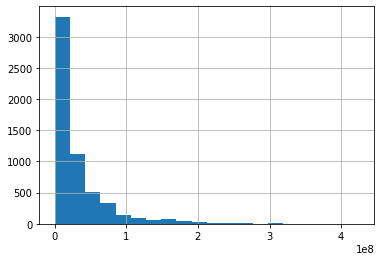

In [473]:
## Distribution of Movie Budgets
df_movie_budgets['production_budget'].hist(bins=20)

In [440]:
top_20_gross_mb = df_movie_budgets.sort_values('worldwide_gross', ascending=False).head(20)
top_20_gross_mb = top_20_gross_mb.sort_values('worldwide_gross', ascending=True)
top_20_gross_mb

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,foreign_gross,profit,profit_margin,roi
425,26,"Dec 17, 2003",The Lord of the Rings: The Return of the King,94000000,377845905,1141403341,2003,Dec,763557436,1047403341,0.917645,11.142589
135,36,"Dec 21, 2018",Aquaman,160000000,335061807,1146894640,2018,Dec,811832833,986894640,0.860493,6.168092
672,73,"Jul 10, 2015",Minions,74000000,336045770,1160336173,2015,Jul,824290403,1086336173,0.936225,14.680219
47,48,"May 3, 2013",Iron Man 3,200000000,408992272,1215392272,2013,May,806400000,1015392272,0.835444,5.076961
22,23,"Apr 14, 2017",The Fate of the Furious,250000000,225764765,1234846267,2017,Apr,1009081502,984846267,0.797546,3.939385
43,44,"Jun 15, 2018",Incredibles 2,200000000,608581744,1242520711,2018,Jun,633938967,1042520711,0.839037,5.212604
134,35,"Mar 17, 2017",Beauty and the Beast,160000000,504014165,1259199706,2017,Mar,755185541,1099199706,0.872935,6.869998
155,56,"Nov 22, 2013",Frozen,150000000,400738009,1272469910,2013,Nov,871731901,1122469910,0.882119,7.483133
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,2018,Jun,888053039,1135772799,0.869809,6.681016
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,Dec,696540365,999721747,0.759251,3.153696


Text(0.5, 1.0, 'Top 20 Grossing Movies')

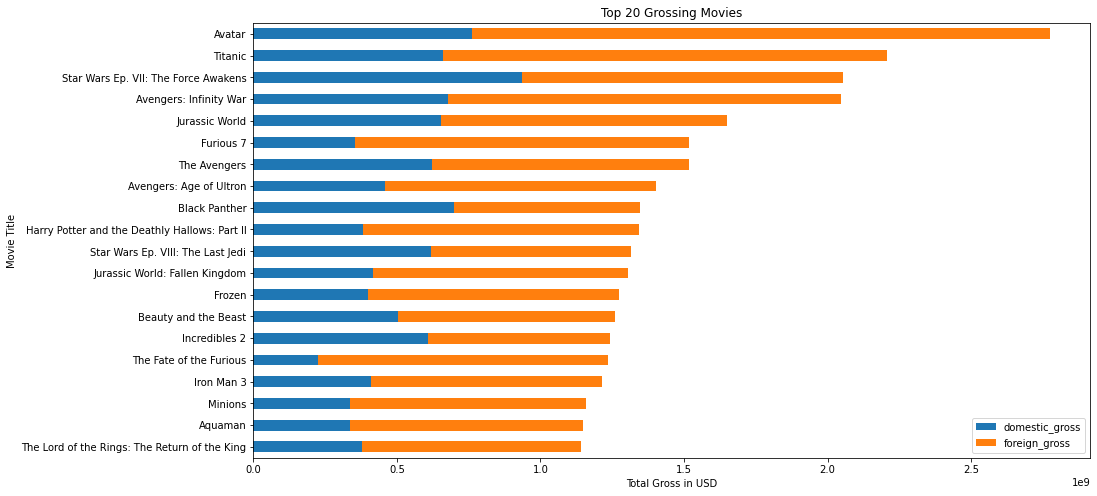

In [441]:
top_20_gross_mb[['movie', 'domestic_gross', 'foreign_gross']].plot(x='movie', kind='barh', figsize=(15,8), stacked=True)
plt.xlabel('Total Gross in USD')
plt.ylabel('Movie Title')
plt.title('Top 20 Grossing Movies')

In [12]:
top_20_gross_domestic = df_movie_budgets.sort_values('domestic_gross', ascending=False).head(20)
top_20_gross_domestic = top_20_gross_domestic.sort_values('domestic_gross', ascending=True)

Text(0.5, 1.0, 'Top 20 Grossing Movies - Domestic')

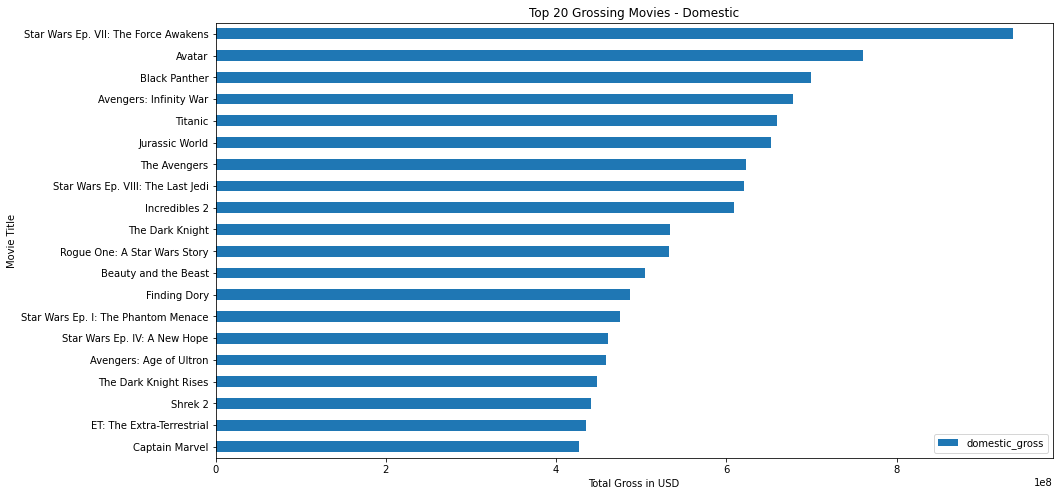

In [14]:
top_20_gross_domestic[['movie', 'domestic_gross']].plot(x='movie', kind='barh', figsize=(15,8))
plt.xlabel('Total Gross in USD')
plt.ylabel('Movie Title')
plt.title('Top 20 Grossing Movies - Domestic')

In [17]:
top_20_gross_mb_profit = df_movie_budgets.sort_values('profit_margin', ascending=False).head(20)
top_20_gross_mb_profit = top_20_gross_mb_profit.sort_values('profit_margin', ascending=True)

Text(0.5, 1.0, 'Movies with Highest ROI')

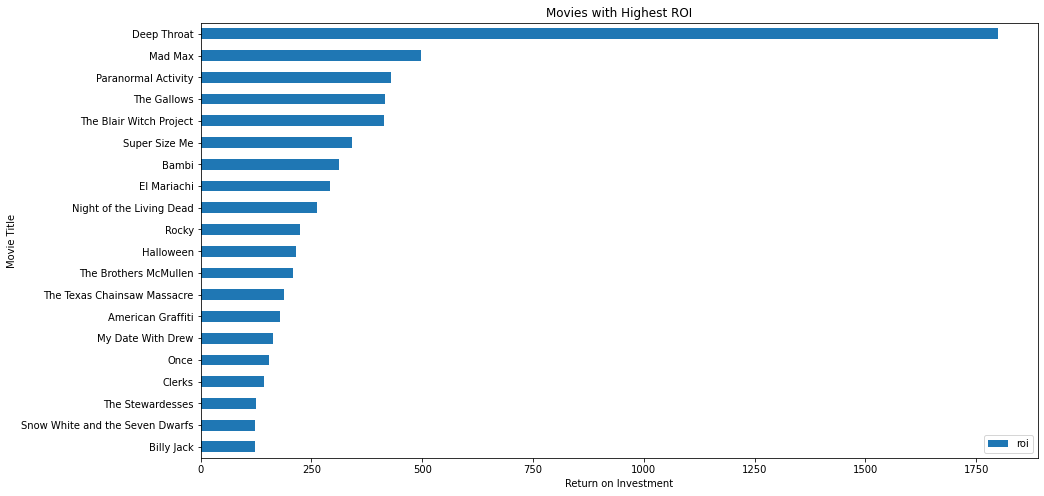

In [16]:
top_20_gross_mb_roi = df_movie_budgets.sort_values('roi', ascending=False).head(20)
top_20_gross_mb_roi = top_20_gross_mb_roi.sort_values('roi', ascending=True)

top_20_gross_mb_roi[['movie', 'roi']].plot(x='movie', kind='barh', figsize=(15,8))
plt.xlabel('Return on Investment')
plt.ylabel('Movie Title')
plt.title('Movies with Highest ROI')

Text(0.5, 1.0, 'Movies with Highest ROI, Budget > $1,000,000')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


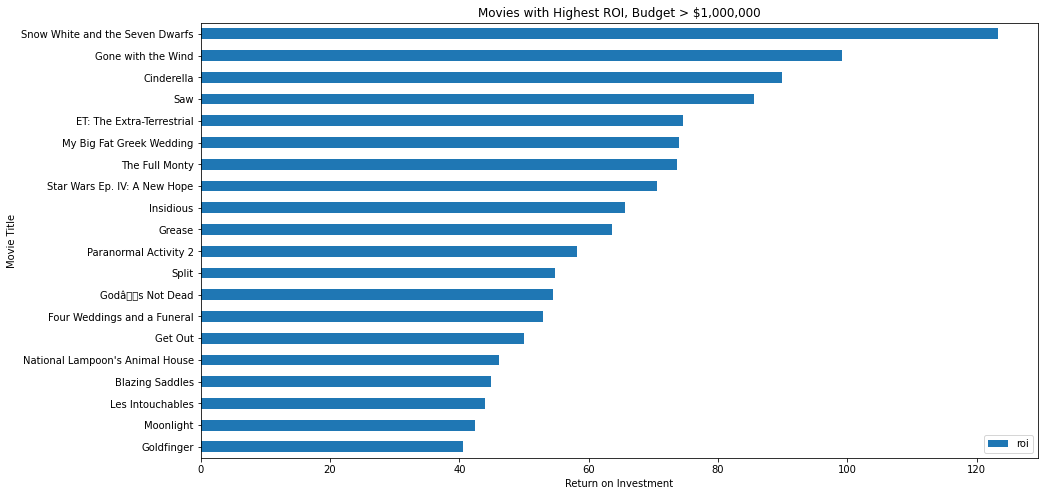

In [23]:
# Top ROI, budget greater than 500k
top_20_gross_mb_roi_1mm = df_movie_budgets[df_movie_budgets['production_budget'] > 1000000].sort_values('roi', ascending=False).head(20)
top_20_gross_mb_roi_1mm = top_20_gross_mb_roi_1mm.sort_values('roi', ascending=True)

#display(top_20_gross_mb_roi_1mm[['movie','release_date','production_budget','worldwide_gross']])

top_20_gross_mb_roi_1mm[['movie', 'roi']].plot(x='movie', kind='barh', figsize=(15,8))
plt.xlabel('Return on Investment')
plt.ylabel('Movie Title')
plt.title('Movies with Highest ROI, Budget > $1,000,000')

## Getting Genres Out

In [350]:
display(df_im.info())
display(df_movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
 10  genre_list         26517 non-null  object 
 11  genres             26517 non-null  object 
 12  Action             26517 non-null  int64  
 13  Adventure          26517 non-null  int64  
 14  Animation          26517 non-null  int64  
 15  Comedy             26517 non-null  int64  
 16  Crime              265

None

<AxesSubplot:xlabel='year', ylabel='worldwide_gross'>

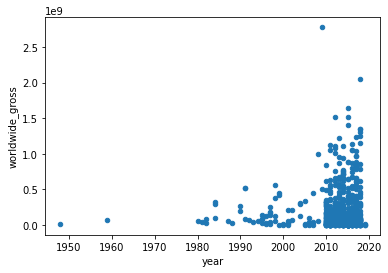

In [450]:
df_action = df_genres[df_genres['Action']==1]
df_action.plot.scatter(x='year',y='worldwide_gross')

<AxesSubplot:xlabel='year', ylabel='worldwide_gross'>

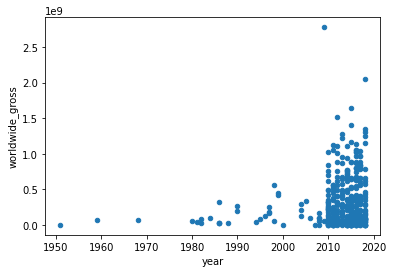

In [451]:
df_adventure = df_genres[df_genres['Adventure']==1]
df_adventure.plot.scatter(x='year',y='worldwide_gross')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='profit'>

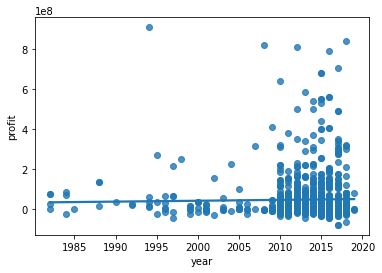

In [332]:
df_drama = df_genres[df_genres['Drama']==1]
#df_drama.plot.scatter(x='year',y='worldwide_gross')

import seaborn as sns

#create scatterplot with regression line
subset = df_drama[df_drama['year']>1980]
sns.regplot(subset['year'], subset['profit'], ci=None)

<AxesSubplot:xlabel='year'>

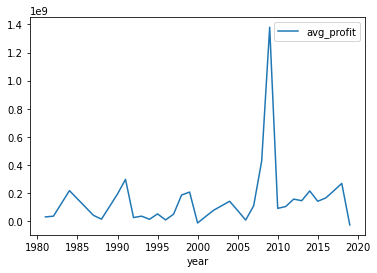

In [327]:
# average profit per yr

action = pd.DataFrame()
action['year'] = list(set(df_action['year']))
action['avg_profit'] = [(df_action['profit'][df_action['year']==year].mean()) 
                                for year in action['year']]

action[action['year']>1980].plot(x='year',y='avg_profit')



<AxesSubplot:xlabel='year'>

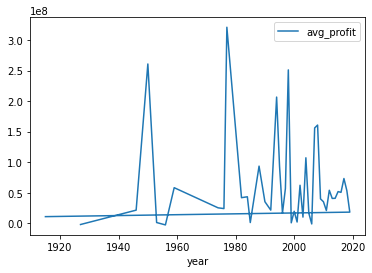

In [328]:
drama = pd.DataFrame()
drama['year'] = list(set(df_drama['year']))
drama['avg_profit'] = [(df_drama['profit'][df_drama['year']==year].mean()) 
                                for year in drama['year']]
drama.plot(x='year',y='avg_profit')

In [317]:
df_action.columns

Index(['movie', 'production_budget', 'year', 'month', 'domestic_gross',
       'worldwide_gross', 'foreign_gross', 'profit', 'profit_margin', 'key',
       'Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count',
       'genre_list', 'genres', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [187]:
display(df_im['primary_title'].nunique())
display(len(df_im))
#df_im.sort_values('primary_title',ascending=False).head(30)
df_im[df_im.duplicated(subset=['primary_title'], keep=False)].sort_values('primary_title').tail(10)
df_im[df_im.duplicated(subset=['movie_id'], keep=False)] # no duplicated movie ids

69248

73052

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_list,Reality-TV,...,Animation,Western,Biography,Music,News,Crime,Musical,Sci-Fi,Adventure,key


In [188]:
df_im['key'] = df_im['primary_title'] + " " + df_im['start_year'].astype(str)
df_movie_budgets['key'] = df_movie_budgets_simple['movie'] + " " + df_movie_budgets['year'].astype(str)

In [189]:
display(df_im['key'].nunique())
display(len(df_im))

72480

73052

In [192]:
df_im.head()
df_im.to_csv('df_im.csv')
#df_movie_budgets_simple.head()

In [112]:
display(df_movie_budgets[df_movie_budgets['movie'].str.contains('Star Wars')])
display(df_im[df_im['primary_title'].str.contains('Star Wars')])
display(df_movie_budgets[df_movie_budgets['movie'].str.contains('Avatar')])
display(df_im[df_im['primary_title'].str.contains('Avatar')])
display(df_movie_budgets[df_movie_budgets['movie'].str.contains('Avengers')])
display(df_im[df_im['primary_title'].str.contains('Avengers')])

,movie,production_budget,year,month,domestic_gross,worldwide_gross,key
4,Star Wars Ep. VIII: The Last Jedi,317000000,2017,Dec,620181382,1316721747,Star Wars Ep. VIII: The Last Jedi 2017
5,Star Wars Ep. VII: The Force Awakens,306000000,2015,Dec,936662225,2053311220,Star Wars Ep. VII: The Force Awakens 2015
11,Solo: A Star Wars Story,275000000,2018,May,213767512,393151347,Solo: A Star Wars Story 2018
44,Rogue One: A Star Wars Story,200000000,2016,Dec,532177324,1049102856,Rogue One: A Star Wars Story 2016
303,Star Wars Ep. I: The Phantom Menace,115000000,1999,May,474544677,1027044677,Star Wars Ep. I: The Phantom Menace 1999
304,Star Wars Ep. III: Revenge of the Sith,115000000,2005,May,380270577,848998877,Star Wars Ep. III: Revenge of the Sith 2005
305,Star Wars Ep. II: Attack of the Clones,115000000,2002,May,310676740,656695615,Star Wars Ep. II: Attack of the Clones 2002
1783,Star Wars Ep. VI: Return of the Jedi,32500000,1983,May,309205079,572705079,Star Wars Ep. VI: Return of the Jedi 1983
2367,Star Wars Ep. V: The Empire Strikes Back,23000000,1980,May,290271960,534161334,Star Wars Ep. V: The Empire Strikes Back 1980
3464,Star Wars Ep. IV: A New Hope,11000000,1977,May,460998007,786598007,Star Wars Ep. IV: A New Hope 1977


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_list,Reality-TV,...,Animation,Western,Biography,Music,News,Crime,Musical,Sci-Fi,Adventure,key
21144,tt2275656,Star Wars: Threads of Destiny,Star Wars: Threads of Destiny,2014,110.0,"Action,Adventure,Sci-Fi",4.1,486,"[Action, Adventure, Sci-Fi]",0,...,0,0,0,0,0,0,0,1,1,Star Wars: Threads of Destiny 2014
25595,tt2488496,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,2015,136.0,"Action,Adventure,Fantasy",8.0,784780,"[Action, Adventure, Fantasy]",0,...,0,0,0,0,0,0,0,0,1,Star Wars: Episode VII - The Force Awakens 2015
26070,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"Action,Adventure,Fantasy",7.1,462903,"[Action, Adventure, Fantasy]",0,...,0,0,0,0,0,0,0,0,1,Star Wars: The Last Jedi 2017
38331,tt3648510,Plastic Galaxy: The Story of Star Wars Toys,Plastic Galaxy: The Story of Star Wars Toys,2014,70.0,"Documentary,History,Sci-Fi",6.5,488,"[Documentary, History, Sci-Fi]",0,...,0,0,0,0,0,0,0,1,0,Plastic Galaxy: The Story of Star Wars Toys 2014
39516,tt3748528,Rogue One: A Star Wars Story,Rogue One,2016,133.0,"Action,Adventure,Sci-Fi",7.8,478592,"[Action, Adventure, Sci-Fi]",0,...,0,0,0,0,0,0,0,1,1,Rogue One: A Star Wars Story 2016
39816,tt3778644,Solo: A Star Wars Story,Solo: A Star Wars Story,2018,135.0,"Action,Adventure,Fantasy",7.0,226243,"[Action, Adventure, Fantasy]",0,...,0,0,0,0,0,0,0,0,1,Solo: A Star Wars Story 2018
40132,tt3810772,Star Wars: The New Republic,Star Wars: The New Republic,2014,NaN,"Action,Adventure,Sci-Fi",6.0,9,"[Action, Adventure, Sci-Fi]",0,...,0,0,0,0,0,0,0,1,1,Star Wars: The New Republic 2014
47521,tt4644286,Star Wars Begins: A Filmumentary,Star Wars Begins: A Filmumentary,2011,139.0,Documentary,8.2,46,[Documentary],0,...,0,0,0,0,0,0,0,0,0,Star Wars Begins: A Filmumentary 2011
57991,tt5957180,Star Wars: The Dark Reckoning,Star Wars: The Dark Reckoning,2017,45.0,Sci-Fi,5.8,12,[Sci-Fi],0,...,0,0,0,0,0,0,0,1,0,Star Wars: The Dark Reckoning 2017
66745,tt7421764,Star Wars: Rise of the First Order,Star Wars: Rise of the First Order,2017,87.0,"Action,Drama",5.4,7,"[Action, Drama]",0,...,0,0,0,0,0,0,0,0,0,Star Wars: Rise of the First Order 2017


,movie,production_budget,year,month,domestic_gross,worldwide_gross,key
0,Avatar,425000000,2009,Dec,760507625,2776345279,Avatar 2009


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_list,Reality-TV,...,Animation,Western,Biography,Music,News,Crime,Musical,Sci-Fi,Adventure,key
9944,tt1775309,Avatar,Abatâ,2011,93.0,Horror,6.1,43,[Horror],0,...,0,0,0,0,0,0,0,0,0,Avatar 2011
12088,tt1854506,Aliens vs. Avatars,Aliens vs. Avatars,2011,80.0,"Horror,Sci-Fi",1.6,1544,"[Horror, Sci-Fi]",0,...,0,0,0,0,0,0,0,1,0,Aliens vs. Avatars 2011
46115,tt4472992,Avatarachi Goshta,Avatarachi Goshta,2014,118.0,Drama,7.9,21,[Drama],0,...,0,0,0,0,0,0,0,0,0,Avatarachi Goshta 2014
48268,tt4727514,The Last Avatar,The Last Avatar,2014,90.0,Drama,5.1,49,[Drama],0,...,0,0,0,0,0,0,0,0,0,The Last Avatar 2014
62751,tt6620864,The Avatar Project,The Avatar Project,2017,66.0,Thriller,3.8,5,[Thriller],0,...,0,0,0,0,0,0,0,0,0,The Avatar Project 2017


,movie,production_budget,year,month,domestic_gross,worldwide_gross,key
3,Avengers: Age of Ultron,330600000,2015,May,459005868,1403013963,Avengers: Age of Ultron 2015
6,Avengers: Infinity War,300000000,2018,Apr,678815482,2048134200,Avengers: Infinity War 2018
26,The Avengers,225000000,2012,May,623279547,1517935897,The Avengers 2012
934,The Avengers,60000000,1998,Aug,23385416,48585416,The Avengers 1998


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_list,Reality-TV,...,Animation,Western,Biography,Music,News,Crime,Musical,Sci-Fi,Adventure,key
325,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,"[Action, Adventure, Sci-Fi]",0,...,0,0,0,0,0,0,0,1,1,The Avengers 2012
604,tt10075836,The Avengers Assemble Premiere,The Avengers Assemble Premiere,2012,NaN,Action,7.2,18,[Action],0,...,0,0,0,0,0,0,0,0,0,The Avengers Assemble Premiere 2012
24058,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,"[Action, Adventure, Sci-Fi]",0,...,0,0,0,0,0,0,0,1,1,Avengers: Age of Ultron 2015
43419,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,"[Action, Adventure, Sci-Fi]",0,...,0,0,0,0,0,0,0,1,1,Avengers: Infinity War 2018
43420,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,181.0,"Action,Adventure,Sci-Fi",8.8,441135,"[Action, Adventure, Sci-Fi]",0,...,0,0,0,0,0,0,0,1,1,Avengers: Endgame 2019
59792,tt6172666,Avengers of Justice: Farce Wars,Avengers of Justice: Farce Wars,2018,87.0,"Action,Comedy,Family",2.4,190,"[Action, Comedy, Family]",0,...,0,0,0,0,0,0,0,0,0,Avengers of Justice: Farce Wars 2018


In [191]:
df_total1 = df_movie_budgets.merge(df_im, how='left', left_on='movie', right_on='original_title')
df_total1.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 6292 entries, 0 to 6291
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              6292 non-null   object 
 1   production_budget  6292 non-null   int64  
 2   year               6292 non-null   int64  
 3   month              6292 non-null   object 
 4   domestic_gross     6292 non-null   int64  
 5   worldwide_gross    6292 non-null   int64  
 6   foreign_gross      6292 non-null   int64  
 7   profit             6292 non-null   int64  
 8   profit_margin      6292 non-null   float64
 9   key_x              6292 non-null   object 
 10  movie_id           2633 non-null   object 
 11  primary_title      2633 non-null   object 
 12  original_title     2633 non-null   object 
 13  start_year         2633 non-null   float64
 14  runtime_minutes    2530 non-null   float64
 15  genres             2633 non-null   object 
 16  averagerating      2633 

In [190]:
df_total = df_movie_budgets.merge(df_im, how='left', on='key')

df_total.head()
df_total.info()
# adding in movie budgets

#df_total_2 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5816 entries, 0 to 5815
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              5816 non-null   object 
 1   production_budget  5816 non-null   int64  
 2   year               5816 non-null   int64  
 3   month              5816 non-null   object 
 4   domestic_gross     5816 non-null   int64  
 5   worldwide_gross    5816 non-null   int64  
 6   foreign_gross      5816 non-null   int64  
 7   profit             5816 non-null   int64  
 8   profit_margin      5816 non-null   float64
 9   key                5816 non-null   object 
 10  movie_id           1496 non-null   object 
 11  primary_title      1496 non-null   object 
 12  original_title     1496 non-null   object 
 13  start_year         1496 non-null   float64
 14  runtime_minutes    1490 non-null   float64
 15  genres             1496 non-null   object 
 16  averagerating      1496 

In [26]:
#df_movie_budgets_simple.head()
#df_total2 = df_total.merge(df_movie_budgets_simple, how='left', left_on='title', right_on='movie')
#df_total2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2285 entries, 0 to 2284
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2285 non-null   object 
 1   studio             2285 non-null   object 
 2   domestic_gross     2285 non-null   float64
 3   foreign_gross      2285 non-null   float64
 4   year_x             2285 non-null   int64  
 5   total_gross        2285 non-null   float64
 6   movie_id           1819 non-null   object 
 7   primary_title      1819 non-null   object 
 8   original_title     1819 non-null   object 
 9   start_year         1819 non-null   float64
 10  runtime_minutes    1783 non-null   float64
 11  genres             1819 non-null   object 
 12  averagerating      1819 non-null   float64
 13  numvotes           1819 non-null   float64
 14  genre_list         1819 non-null   object 
 15  Reality-TV         1819 non-null   float64
 16  Thriller           1819 

In [14]:
df_total.columns

# Other columns to potentially add: budget / profit margin , return, movie rating

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'total_gross', 'movie_id', 'primary_title', 'original_title',
       'start_year', 'runtime_minutes', 'genres', 'averagerating', 'numvotes',
       'genre_list', 'Reality-TV', 'Thriller', 'Game-Show', 'Horror', 'Drama',
       'Family', 'Mystery', 'Adult', 'Action', 'Short', 'War', 'Documentary',
       'Comedy', 'Romance', 'Fantasy', 'History', 'Sport', 'Animation',
       'Western', 'Biography', 'Music', 'News', 'Crime', 'Musical', 'Sci-Fi',
       'Adventure'],
      dtype='object')

Action movies average gross:  159458387.82419354
Drama movies average gross:  77239944.35776837
Action movies average rating (num votes > 100):  6.420712694877505
Drama movies average rating (num votes > 100):  6.665704387990762


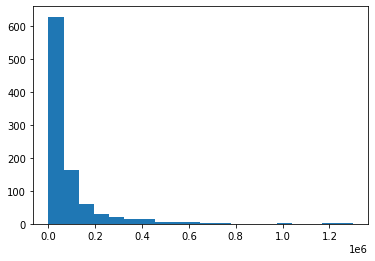

In [27]:
# Genres

df_drama = df_total[df_total['Drama'] != 0]
df_action = df_total[df_total['Action'] != 0]
print('Action movies average gross: ', df_action['total_gross'].mean())
print('Drama movies average gross: ', df_drama['total_gross'].mean())

# What should be the cutoff point for minimum number of votes to use rating?
plt.hist(df_drama['numvotes'], bins=20)
df_drama['numvotes'].mean() - (df_drama['numvotes'].std()) # negative b/c left skew, just going to pick 100 

print('Action movies average rating (num votes > 100): ', df_action['averagerating'][df_action['numvotes'] > 100].mean())
print('Drama movies average rating (num votes > 100): ', df_drama['averagerating'][df_drama['numvotes'] > 100].mean())

# also want to look at how many action movies have multiple genres, and whether having multiple genres affects 

In [16]:
df_movie_info.info() 
# Too few entries, probably not going to use this unless I am missing the information elsewhere

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


## Top 20 Movies Analysis

In [18]:
df_total2.sort_values('total_gross', ascending=False).head(20)

,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_id,primary_title,original_title,start_year,...,Western,Biography,Music,News,Crime,Musical,Sci-Fi,Adventure,movie,production_budget
682,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1443,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Avengers: Age of Ultron,330600000.0
2089,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09,tt1825683,Black Panther,Black Panther,2018.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Black Panther,200000000.0
350,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN
2090,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Jurassic World: Fallen Kingdom,170000000.0
948,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09,tt2294629,Frozen,Frozen,2013.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Frozen,150000000.0
947,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09,tt1611845,Frozen,Wai nei chung ching,2010.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Frozen,150000000.0
946,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09,tt1323045,Frozen,Frozen,2010.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Frozen,150000000.0
1882,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [452]:
display(df_movie_gross_complete[df_movie_gross_complete['title'].str.contains('Avengers')])
display(df_movie_budgets[df_movie_budgets['movie'].str.contains('Avengers')])
df_movie_budgets['year'] = [int(date[-4:]) for date in df_movie_budgets['release_date']]

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3079,Avengers: Infinity War,BV,678800000.0,1369.5,2018,6.788014e+08


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,foreign_gross,profit,profit_margin,roi
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,May,944008095,1072413963,0.764364,3.243841
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,Apr,1369318718,1748134200,0.853525,5.827114
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,2012,May,894656350,1292935897,0.851772,5.746382
934,35,"Aug 14, 1998",The Avengers,60000000,23385416,48585416,1998,Aug,25200000,-11414584,-0.234938,-0.190243


In [28]:
display(df_movie_gross_complete[df_movie_gross_complete['title'].str.contains('Star Wars')])
display(df_movie_budgets[df_movie_budgets['movie'].str.contains('Star Wars')])

,title,studio,domestic_gross,foreign_gross,year,total_gross
793,Star Wars: Episode I - The Phantom Menace (in 3D),Fox,43500000.0,59300000.0,2012,1.028000e+08
1872,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015,9.367011e+08
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000.0,2016,1.056100e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
3101,Solo: A Star Wars Story,BV,213800000.0,179200000.0,2018,3.930000e+08


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2015
11,12,"May 25, 2018",Solo: A Star Wars Story,"$275,000,000","$213,767,512","$393,151,347",2018
44,45,"Dec 16, 2016",Rogue One: A Star Wars Story,"$200,000,000","$532,177,324","$1,049,102,856",2016
303,4,"May 19, 1999",Star Wars Ep. I: The Phantom Menace,"$115,000,000","$474,544,677","$1,027,044,677",1999
304,5,"May 19, 2005",Star Wars Ep. III: Revenge of the Sith,"$115,000,000","$380,270,577","$848,998,877",2005
305,6,"May 16, 2002",Star Wars Ep. II: Attack of the Clones,"$115,000,000","$310,676,740","$656,695,615",2002
1783,84,"May 25, 1983",Star Wars Ep. VI: Return of the Jedi,"$32,500,000","$309,205,079","$572,705,079",1983
2367,68,"May 21, 1980",Star Wars Ep. V: The Empire Strikes Back,"$23,000,000","$290,271,960","$534,161,334",1980
3464,65,"May 25, 1977",Star Wars Ep. IV: A New Hope,"$11,000,000","$460,998,007","$786,598,007",1977


## Seasonality

In [463]:
import datetime

# average gross per month
season = pd.DataFrame()
season['month'] = list(set(df_movie_budgets['month']))
season['month_num'] = [datetime.datetime.strptime(month, "%b").month for month in season['month']]
season['avg_dom_gross'] = [(df_movie_budgets['domestic_gross'][df_movie_budgets['month']==month].mean()) 
                                for month in season['month']]
season['avg_fn_gross'] = [(df_movie_budgets['foreign_gross'][df_movie_budgets['month']==month].mean()) 
                                for month in season['month']]
season['avg_ww_gross'] = [(df_movie_budgets['worldwide_gross'][df_movie_budgets['month']==month].mean()) 
                                for month in season['month']]
season['avg_budget'] = [(df_movie_budgets['production_budget'][df_movie_budgets['month']==month].mean()) 
                                for month in season['month']]
season['roi'] = [(df_movie_budgets['roi'][df_movie_budgets['month']==month].mean()) 
                                for month in season['month']]

season = season.sort_values('month_num')

Text(0.5, 1.0, 'Average Grossed by Month')

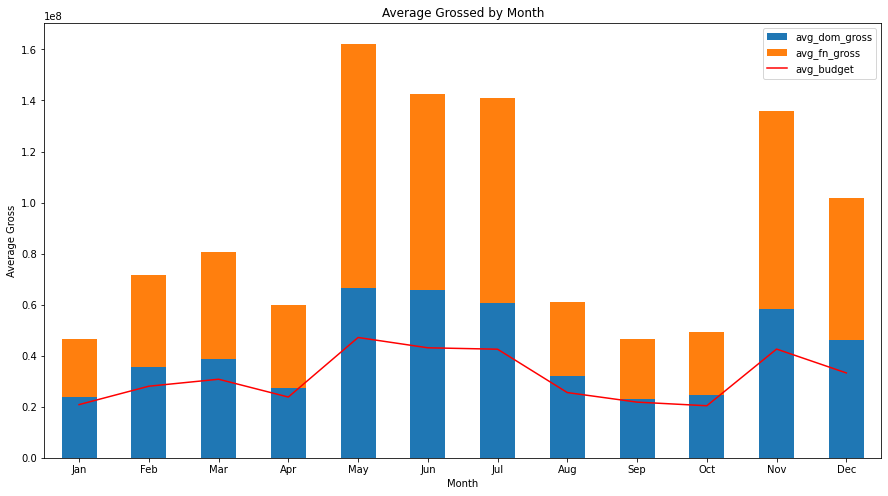

In [455]:
ax = season[['month', 'avg_dom_gross', 'avg_fn_gross']].plot(x='month', kind='bar', figsize=(15,8), stacked=True)
season.plot(y='avg_budget', x='month', ax=ax, color='Red')
plt.xlabel('Month')
plt.ylabel('Average Gross')
plt.title('Average Grossed by Month')

Text(0.5, 1.0, 'Average ROI by Month')

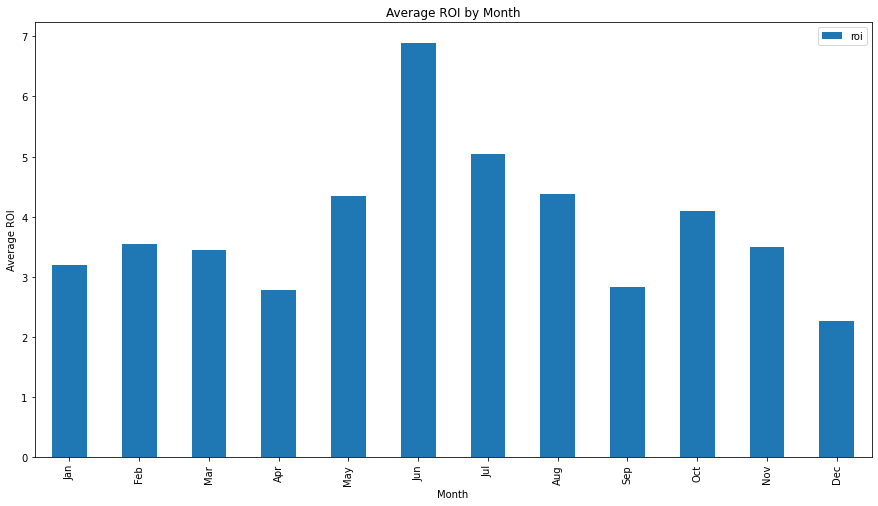

In [464]:
ax = season[['month', 'roi']].plot(x='month', kind='bar', figsize=(15,8))
plt.xlabel('Month')
plt.ylabel('Average ROI')
plt.title('Average ROI by Month')

## Movies Released in the Last Decade

In [456]:
recent = df_genres[df_genres['year'] >= 2010]
recent.info()

#recent.genre_list.map(len)
print("Movies with more than one genre: " + str(len(recent[recent['genre_list'].str.len()>1])))
print("Movies with one genre: " + str(len(recent[recent['genre_list'].str.len()==1])))
#recent['genres'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2486 entries, 1 to 6137
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_x               2486 non-null   int64  
 1   release_date_x     2486 non-null   object 
 2   movie              2486 non-null   object 
 3   production_budget  2486 non-null   int64  
 4   domestic_gross     2486 non-null   int64  
 5   worldwide_gross    2486 non-null   int64  
 6   year               2486 non-null   int64  
 7   month              2486 non-null   object 
 8   foreign_gross      2486 non-null   int64  
 9   profit             2486 non-null   int64  
 10  profit_margin      2486 non-null   float64
 11  roi                2486 non-null   float64
 12  Unnamed: 0         2001 non-null   float64
 13  genre_ids          2001 non-null   object 
 14  id_y               2001 non-null   float64
 15  original_language  2001 non-null   object 
 16  original_title     2001 

In [457]:
#df_genres_clean = df_genres.dropna(subset='genre_list') #drop NAs for now
recent_clean = recent.dropna(subset='genre_list')

In [469]:
# Count of movies per genre
genres = pd.DataFrame()
genres['genre'] = list(set([item for sublist in recent_clean['genre_list'] for item in sublist]))
# Why is there a None genre?
genres = genres[~genres['genre'].isnull()]

genres['count'] = [sum(recent_clean[f'{genre}']) for genre in genres['genre']]
genres['gross'] = [sum(recent_clean['worldwide_gross'][recent_clean[f'{genre}']==1]) 
                   for genre in genres['genre']]
genres['profit'] = [sum(recent_clean['profit'][recent_clean[f'{genre}']==1]) 
                   for genre in genres['genre']]
genres['avg_profit_per_movie'] = genres['profit'] / genres['count']
genres['roi'] = [recent_clean['roi'][recent_clean[f'{genre}']==1].mean() for genre in genres['genre']]
genres['profit_margin'] = genres['profit'] / genres['gross']
genres['vote_avg'] = [recent_clean['vote_average'][recent_clean[f'{genre}']==1].mean() for genre in genres['genre']]
genres['popularity'] = [recent_clean['popularity'][recent_clean[f'{genre}']==1].mean() for genre in genres['genre']]

#[(df_movie_budgets_simple['domestic_gross'][df_movie_budgets_simple['month']==month].mean()) 
#                                for month in season['month']]

In [470]:
display(genres.sort_values('avg_profit_per_movie', ascending=False))
display(genres.sort_values('roi', ascending=False))

# show top 10 by count, gross, profit per movie, avg roi

,genre,count,gross,profit,avg_profit_per_movie,roi,profit_margin,vote_avg,popularity
14,Animation,119.0,44425203011,33183203011,2.788504e+08,2.978536,0.746945,6.470588,15.023807
19,Adventure,323.0,115615097500,81031312500,2.508709e+08,2.036247,0.700871,6.376161,18.233805
10,Fantasy,191.0,59975250352,41591600352,2.177571e+08,2.359143,0.693479,6.265969,17.707016
3,Family,197.0,57819952704,41568802704,2.110092e+08,2.229385,0.718935,6.347716,13.712081
7,Science Fiction,238.0,60008102298,41385112298,1.738870e+08,2.131970,0.689659,6.208824,16.341782
6,Action,470.0,114241379343,77184544343,1.642224e+08,1.658152,0.675627,6.093191,16.428343
12,Comedy,603.0,76273946988,53906234815,8.939674e+07,2.200104,0.706745,6.202653,11.219212
8,War,51.0,5905280229,3700480229,7.255844e+07,1.306709,0.626639,6.601961,12.697902
18,Crime,258.0,24623385188,15589845188,6.042576e+07,1.156090,0.633132,6.289922,12.500295
11,Romance,238.0,20632749239,14327478239,6.019949e+07,2.691144,0.694405,6.463025,10.308076


,genre,count,gross,profit,avg_profit_per_movie,roi,profit_margin,vote_avg,popularity
1,Horror,262.0,16154664902,11886492529,4.536829e+07,7.015635,0.735793,5.560305,9.706859
0,Thriller,554.0,49998203702,32710111052,5.904352e+07,3.579480,0.654226,6.006859,12.082841
4,Mystery,154.0,11826794909,7883747259,5.119316e+07,3.106687,0.666600,6.044156,11.793364
14,Animation,119.0,44425203011,33183203011,2.788504e+08,2.978536,0.746945,6.470588,15.023807
11,Romance,238.0,20632749239,14327478239,6.019949e+07,2.691144,0.694405,6.463025,10.308076
10,Fantasy,191.0,59975250352,41591600352,2.177571e+08,2.359143,0.693479,6.265969,17.707016
3,Family,197.0,57819952704,41568802704,2.110092e+08,2.229385,0.718935,6.347716,13.712081
12,Comedy,603.0,76273946988,53906234815,8.939674e+07,2.200104,0.706745,6.202653,11.219212
7,Science Fiction,238.0,60008102298,41385112298,1.738870e+08,2.131970,0.689659,6.208824,16.341782
17,Music,55.0,4490658410,3140958410,5.710833e+07,2.101978,0.699443,6.460000,9.230800


Text(0.5, 1.0, 'Average ROI by Month')

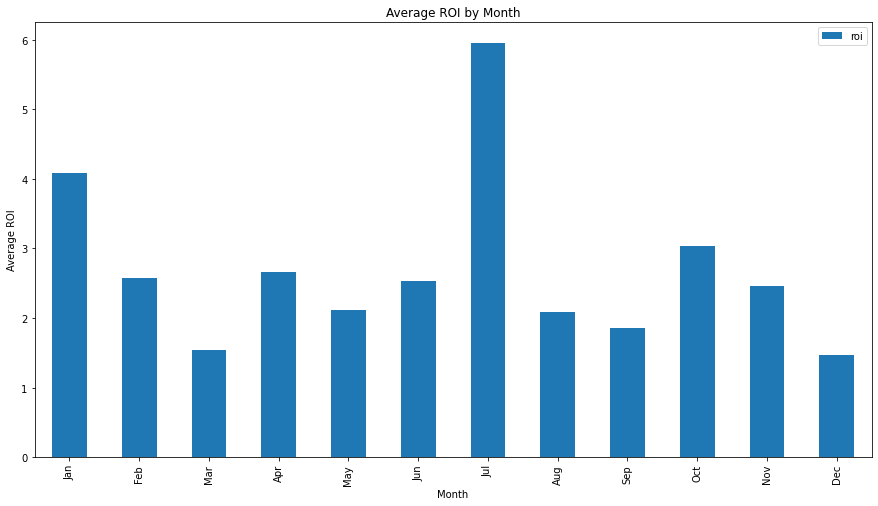

In [466]:
# ROI any different in the last decade?
season_rec = pd.DataFrame()
season_rec['month'] = list(set(recent_clean['month']))
season_rec['month_num'] = [datetime.datetime.strptime(month, "%b").month for month in season_rec['month']]
season_rec['avg_dom_gross'] = [(recent_clean['domestic_gross'][recent_clean['month']==month].mean()) 
                                for month in season_rec['month']]
season_rec['avg_fn_gross'] = [(recent_clean['foreign_gross'][recent_clean['month']==month].mean()) 
                                for month in season_rec['month']]
season_rec['avg_ww_gross'] = [(recent_clean['worldwide_gross'][recent_clean['month']==month].mean()) 
                                for month in season_rec['month']]
season_rec['avg_budget'] = [(recent_clean['production_budget'][recent_clean['month']==month].mean()) 
                                for month in season_rec['month']]
season_rec['roi'] = [(recent_clean['roi'][recent_clean['month']==month].mean()) 
                                for month in season_rec['month']]

season_rec = season_rec.sort_values('month_num')

ax = season_rec[['month', 'roi']].plot(x='month', kind='bar', figsize=(15,8))
plt.xlabel('Month')
plt.ylabel('Average ROI')
plt.title('Average ROI by Month')

# Jan a little more elevated vs other months, July sees big jump vs June, could just be a few outliers dragging
# this number higher

## Key Findings

In [ ]:
# In the last decade, horror/thriller/mystery seem to garner biggest ROI, despite low popularity / reviews
# Adventure category is highest grossing but animation takes the lead in terms of avg profit per movie made
# While drama has seen the most number of movies produced since 2010, it is among the least profitable
# Adventure is highest grossing, second most profitable. Animation is most profitable, ROI fairly high as well
# animations seems like perfect movie for Microsoft

# Seasonality: summer months are best time to put out a movie, both in terms of gross profit and ROI

In [ ]:
# show genre, rating for each of these movies
top_20_gross_mb_roi

## Appendix

Text(0.5, 1.0, 'Movies with Highest Profit Margin')

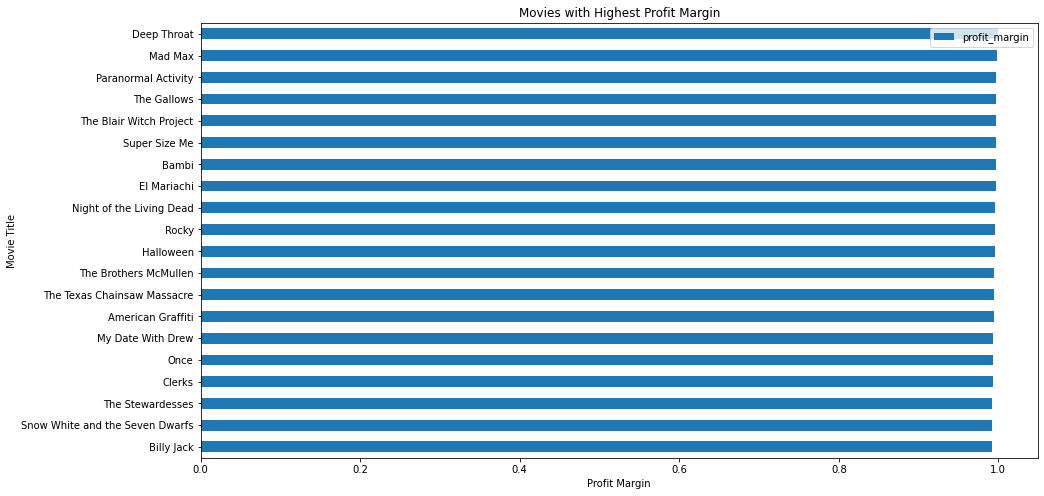

In [18]:
## Not Useful Visualization

top_20_gross_mb_profit[['movie', 'profit_margin']].plot(x='movie', kind='barh', figsize=(15,8))
plt.xlabel('Profit Margin')
plt.ylabel('Movie Title')
plt.title('Movies with Highest Profit Margin')

### Exploring Movie Gross Dataset

In [6]:
display(df_movie_gross.info())
# Data types look OK except for foreign_gross - should be an int or float, going to look into this column a bit more
# I also think it makes sense to include a total_gross column, once we convert this datatype will add new column
# foreign gross has lots of NaNs, studio and domestic have a few

# Checking for NAs
sum(df_movie_gross['foreign_gross'].isna()) # There are 1,350 NAs, in a normal situation would delete this column
                                            # but this is probably useful info, considering replacing these with 0

display(df_movie_gross[df_movie_gross['foreign_gross'].isna()].sample(5)) # Shouldn't replace these with 0, will create a 
                                                                 # dataset that doesn't have NaN for foreign box office

display(df_movie_gross[df_movie_gross['studio'].isna()])
display(df_movie_gross[df_movie_gross['domestic_gross'].isna()]) # Going to exclude these
df_movie_gross = df_movie_gross[(df_movie_gross['studio'].isna() == False) & 
                                (df_movie_gross['domestic_gross'].isna() == False)]
df_movie_gross_complete = df_movie_gross[df_movie_gross['foreign_gross'].isna() == False]


#[float(x) for x in df_movie_gross['foreign_gross']] # looks like there are commas in here, 
# will need to get rid of these
df_movie_gross_complete['foreign_gross'] = [float(str(x).replace(',','')) 
                                            for x in df_movie_gross_complete['foreign_gross']]
df_movie_gross_complete.info()

df_movie_gross_complete['total_gross'] = df_movie_gross_complete['domestic_gross'] + df_movie_gross_complete['foreign_gross']
df_movie_gross_complete.head()

top_20_total_gross = df_movie_gross_complete.sort_values('total_gross', ascending=False).head(20)
top_20_total_gross = top_20_total_gross.sort_values('total_gross', ascending=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


None

,title,studio,domestic_gross,foreign_gross,year
1294,Bullet to the Head,WB,9500000.0,NaN,2013
2651,Our Last Tango,Strand,100000.0,NaN,2016
2905,Wish Upon,BG,14300000.0,NaN,2017
2234,The Ark of Mr. Chow,CL,54100.0,NaN,2015
1828,Half of a Yellow Sun,Mont.,54500.0,NaN,2014


,title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000,2010
555,Fireflies in the Garden,NaN,70600.0,3300000,2011
933,Keith Lemon: The Film,NaN,NaN,4000000,2012
1862,Plot for Peace,NaN,7100.0,NaN,2014
2825,Secret Superstar,NaN,NaN,122000000,2017


,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000,2010
298,Celine: Through the Eyes of the World,Sony,NaN,119000,2010
302,White Lion,Scre.,NaN,99600,2010
306,Badmaash Company,Yash,NaN,64400,2010
327,Aashayein (Wishes),Relbig.,NaN,3800,2010
537,Force,FoxS,NaN,4800000,2011
713,Empire of Silver,NeoC,NaN,19000,2011
871,Solomon Kane,RTWC,NaN,19600000,2012
928,The Tall Man,Imag.,NaN,5200000,2012
933,Keith Lemon: The Film,NaN,NaN,4000000,2012


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB


/var/folders/wl/4cw_k4nj07d773kdv1fw53tc0000gn/T/ipykernel_9956/3141268714.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie_gross_complete['foreign_gross'] = [float(str(x).replace(',',''))
/var/folders/wl/4cw_k4nj07d773kdv1fw53tc0000gn/T/ipykernel_9956/3141268714.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie_gross_complete['total_gross'] = df_movie_gross_complete['domestic_gross'] + df_movie_gross_complete['foreign_gross']


In [7]:
df_movie_gross_complete[df_movie_gross_complete['title'].str.contains('Iron')]

,title,studio,domestic_gross,foreign_gross,year,total_gross
6,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08
393,The Iron Lady,Wein.,30000000.0,84900000.0,2011,1.149000e+08
870,The Man with the Iron Fists,Uni.,15600000.0,4099999.0,2012,1.970000e+07
911,Iron Sky,EOne,122000.0,8000000.0,2012,8.122000e+06
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09


Text(0.5, 1.0, 'Top 20 Grossing Movies')

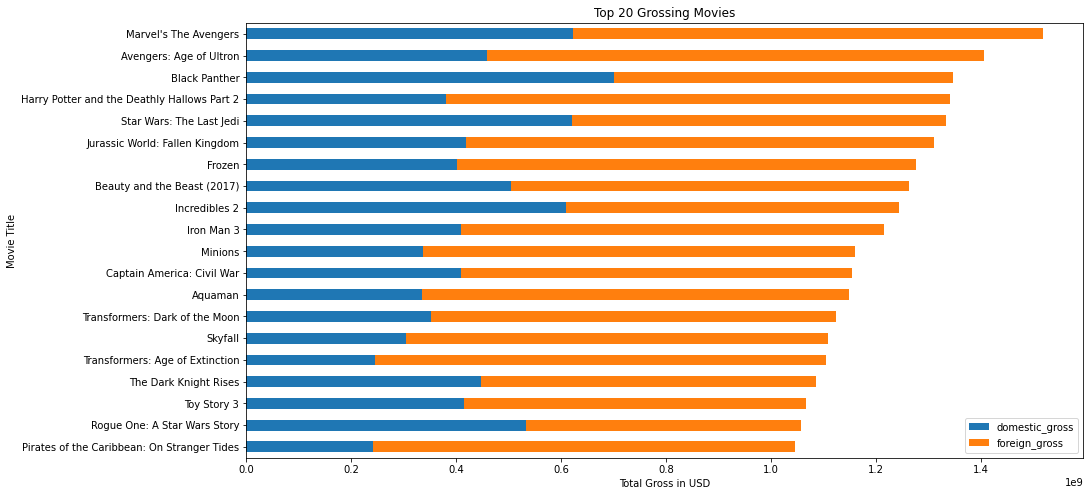

In [92]:
top_20_total_gross[['title', 'domestic_gross', 'foreign_gross']].plot(x='title', kind='barh', figsize=(15,8), stacked=True)
plt.xlabel('Total Gross in USD')
plt.ylabel('Movie Title')
plt.title('Top 20 Grossing Movies')

## Seems to be missing some of the top grossing movies of all time, will see if there is another data set 
## with better data

### IMDB Dataset - Decided Against Using It

In [ ]:
# clean df_im - only a few missing genres, will drop those
df_im.dropna(subset='genres', inplace=True)

# don't need this variable
df_im['genre_list'] = [genres.split(',') for genres in df_im['genres']]


genre_list = [item for sublist in df_im['genre_list'] for item in sublist]
genre_list = list(set(genre_list))

# create columns for genre category
import numpy as np
stringsCheck = genre_list
for i in stringsCheck:
    df_im[f'{i}'] = np.where(df_im.genres.str.contains(f'{i}'), 1, 0)
    